## Imports

In [1]:
from google_play_scraper import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
import os
N = 5
pd.set_option('display.max_colwidth', None)

## Variables

In [2]:
main_folder = '/home/ics-home/sentiment_analysis/'
category_folders = ['apps_made_for_disabled/','browser/','entertainment/','music/','shopping/','social_media/']
folder_catergory_map = {'apps_made_for_disabled/':'Accessibility Apps',
                        'browser/':'Browser',
                        'entertainment/':'Entertainment',
                        'music/':'Music',
                        'shopping/':'Shopping',
                        'social_media/':'Social Media'
                       }
dfs = []

## Combine Reviews from all apps in a category to a single file

In [3]:
for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(folder_path):  # Check if folder
        csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]  # Get CSV files in folder
        if csv_files:  # Check if any CSV files in folder
            df_merged = pd.concat([pd.read_csv(os.path.join(folder_path, f)) for f in csv_files])
            # Save merged data to new CSV file in folder
            #df_merged.to_csv(os.path.join(folder_path, f'{folder}_merged.csv'), index=False)
            df_merged.to_csv(os.path.join(folder_path, 'merged_reviews.csv'), index=False)

## Add Category Field to all the Merged Reviews

In [4]:
for folder in category_folders:
    folder_path = os.path.join(main_folder, folder)
    csv_file = os.path.join(folder_path,'merged_reviews.csv')
    if os.path.isfile(csv_file):
        df = pd.read_csv(csv_file)
        print(f"Working on: {folder}")
        df['category'] = folder_catergory_map[folder]
        df.to_csv(os.path.join(folder_path, 'merged_reviews.csv'), index=False)

Working on: apps_made_for_disabled/
Working on: browser/
Working on: entertainment/
Working on: music/
Working on: shopping/
Working on: social_media/


## Iterate through folders

In [5]:
for app_folder in os.listdir(main_folder):
    app_path = os.path.join(main_folder, app_folder)
    if os.path.isdir(app_path):
        csv_path = os.path.join(app_path, 'merged_reviews.csv')
        print(f"Working on: {csv_path}")
        if os.path.isfile(csv_path):
            df = pd.read_csv(csv_path)
            dfs.append(df)

Working on: /home/ics-home/sentiment_analysis/apps_made_for_disabled/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis/browser/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis/entertainment/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis/music/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis/shopping/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis/social_media/merged_reviews.csv


## Merging and Calculating Percentage

In [6]:
merged_df = pd.concat(dfs)

grouped = merged_df.groupby(['category', 'sentiment']).size().unstack()

grouped['Positive_pct'] = grouped['positive'] / grouped.sum(axis=1)
grouped['Negative_pct'] = grouped['negative'] / grouped.sum(axis=1)

In [13]:
grouped

sentiment,positive,Positive_pct,negative,Negative_pct
category,,,,
Accessibility Apps,2700,0.526316,2430,0.473636
Browser,1072,0.588042,751,0.411825
Entertainment,1722,0.387314,2724,0.612632
Music,725,0.542665,611,0.457150
Shopping,1409,0.613409,888,0.386488
Social Media,1308,0.452595,1582,0.547319


In [12]:
grouped = grouped.reindex(columns=['positive', 'Positive_pct', 'negative','Negative_pct'])

## Create Plot

In [8]:
'''
ax = grouped[['Positive_pct', 'Negative_pct']].plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_title('Percentage of Positive and Negative Reviews by App Category')
ax.set_xlabel('App Category')
ax.set_ylabel('Percentage')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)
'''

"\nax = grouped[['Positive_pct', 'Negative_pct']].plot(kind='bar', stacked=True, figsize=(10, 6))\n\nax.set_title('Percentage of Positive and Negative Reviews by App Category')\nax.set_xlabel('App Category')\nax.set_ylabel('Percentage')\n\n# Rotate the x-axis labels for readability\nplt.xticks(rotation=45)\n"

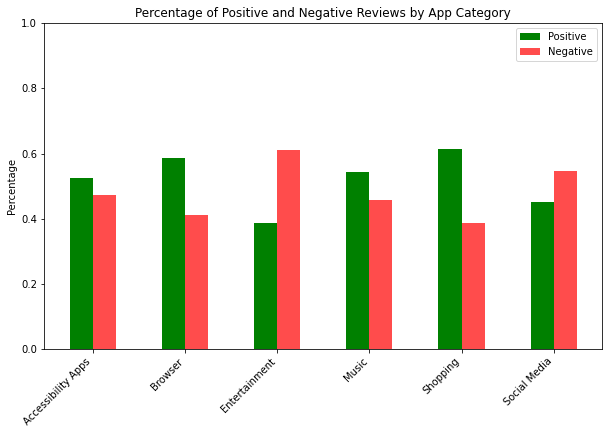

In [9]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(grouped.index))

# Plot the positive and negative bars for each category
ax.bar(x_pos, grouped['Positive_pct'], width=bar_width, align='center', color='green', label='Positive')
ax.bar(x_pos + bar_width, grouped['Negative_pct'], width=bar_width, align='center', color='red', label='Negative', alpha=0.7)

# Set the x-axis labels to the category names
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(grouped.index, rotation=45, ha='right')

# Set the y-axis limits and labels
ax.set_ylim(0, 1)
ax.set_ylabel('Percentage')

# Add a legend and title
ax.legend()
ax.set_title('Percentage of Positive and Negative Reviews by App Category')

plt.show()

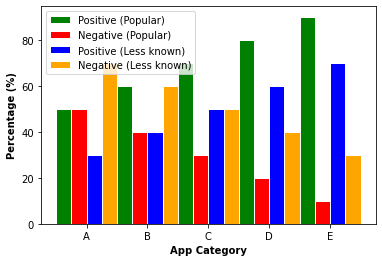

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# create example dataframes
df1 = pd.DataFrame({'Category': ['A', 'B', 'C', 'D', 'E'],
                   'Positive': [50, 60, 70, 80, 90],
                   'Negative': [50, 40, 30, 20, 10]})
df2 = pd.DataFrame({'Category': ['A', 'B', 'C', 'D', 'E'],
                   'Positive': [30, 40, 50, 60, 70],
                   'Negative': [70, 60, 50, 40, 30]})

# set width of the bars
barWidth = 0.25

# set heights of the bars
bars1 = df1['Positive']
bars2 = df1['Negative']
bars3 = df2['Positive']
bars4 = df2['Negative']

# set positions of the bars on the x-axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]
r4 = [x + 3*barWidth for x in r1]

# plot the bars
plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='Positive (Popular)')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='Negative (Popular)')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Positive (Less known)')
plt.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='Negative (Less known)')

# add xticks on the middle of the group bars
plt.xlabel('App Category', fontweight='bold')
plt.xticks([r + 1.5*barWidth for r in range(len(bars1))], df1['Category'])

# add y-axis label
plt.ylabel('Percentage (%)', fontweight='bold')

# add legend
plt.legend()

# show plot
plt.show()


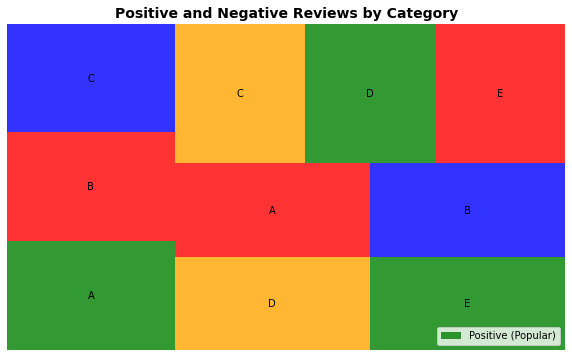

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# create example dataframes
df1 = pd.DataFrame({'Category': ['A', 'B', 'C', 'D', 'E'],
                   'Positive': [50, 60, 70, 80, 90],
                   'Negative': [50, 40, 30, 20, 10]})
df2 = pd.DataFrame({'Category': ['A', 'B', 'C', 'D', 'E'],
                   'Positive': [30, 40, 50, 60, 70],
                   'Negative': [70, 60, 50, 40, 30]})

# combine dataframes
df = pd.concat([df1, df2])
df['Total'] = df['Positive'] + df['Negative']

# create treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=df['Total'], label=df['Category'], alpha=0.8, color=['green', 'red', 'blue', 'orange'])

# add labels and legend
plt.axis('off')
plt.title('Positive and Negative Reviews by Category', fontweight='bold', fontsize=14)
plt.legend(['Positive (Popular)', 'Negative (Popular)', 'Positive (Less Known)', 'Negative (Less Known)'], loc='lower right')

# show plot
plt.show()


In [19]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


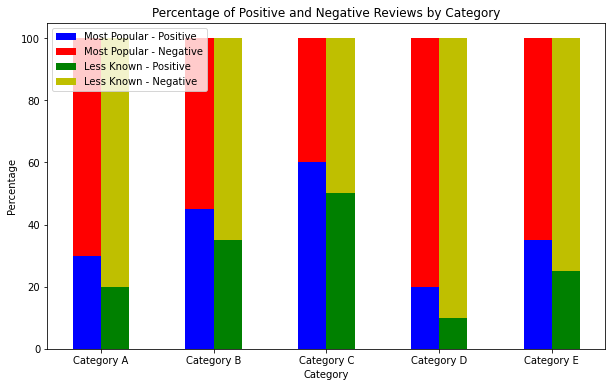

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample dataframes
most_popular_apps = pd.DataFrame({'Category': ['Category A', 'Category B', 'Category C', 'Category D', 'Category E'],
                                   'Positive': [30, 45, 60, 20, 35],
                                   'Negative': [70, 55, 40, 80, 65]})

less_known_apps = pd.DataFrame({'Category': ['Category A', 'Category B', 'Category C', 'Category D', 'Category E'],
                                   'Positive': [20, 35, 50, 10, 25],
                                   'Negative': [80, 65, 50, 90, 75]})

# Set up data for grouped bar chart
categories = most_popular_apps['Category']
bar_width = 0.25
x_pos1 = np.arange(len(categories))
x_pos2 = [x + bar_width for x in x_pos1]

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x_pos1, most_popular_apps['Positive'], width=bar_width, color='b', label='Most Popular - Positive')
plt.bar(x_pos1, most_popular_apps['Negative'], width=bar_width, color='r', bottom=most_popular_apps['Positive'], label='Most Popular - Negative')
plt.bar(x_pos2, less_known_apps['Positive'], width=bar_width, color='g', label='Less Known - Positive')
plt.bar(x_pos2, less_known_apps['Negative'], width=bar_width, color='y', bottom=less_known_apps['Positive'], label='Less Known - Negative')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(x_pos1 + bar_width/2, categories)
plt.title('Percentage of Positive and Negative Reviews by Category')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()
